In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\visha\.cache\kagglehub\datasets\datatattle\covid-19-nlp-text-classification\versions\1


In [4]:
import pandas as pd
df = pd.read_csv('Corona_NLP_train.csv',encoding='latin-1')
#df=df.sample(5000).reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
df['OriginalTweet'][7]


"Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ"

In [10]:
df['OriginalTweet'][5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [12]:
df.shape

(41157, 6)

In [14]:
df.Sentiment.value_counts(normalize=True)

Sentiment
Positive              0.277523
Negative              0.240955
Neutral               0.187404
Extremely Positive    0.160945
Extremely Negative    0.133173
Name: proportion, dtype: float64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Text Classification
'''
Confusion matrix

precsion / recall / f1-score

auc-roc scores

accuracy

train data or test data

i have build a model having f1-score 0.7 .

'''

Text(0.5, 1.0, 'Sentiment Distribution')

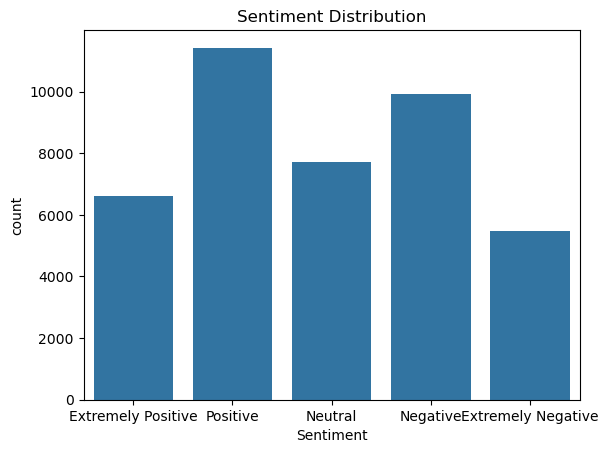

In [18]:


sns.countplot( data=df, x='Sentiment', order = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative'])
plt.title("Sentiment Distribution")

In [62]:
df=df.reset_index(drop=True)
dfs=df.sample(6000)
dfs=dfs.reset_index(drop=True)

In [64]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
import re 

stem=PorterStemmer()
corpus = []



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [196]:
dfs

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,43815,88767,Lima-PerÃº,13-04-2020,"Private charter airlines set their own prices,...",Positive,privat charter airlin set price gener higher ...
1,27581,72533,NaN,26-03-2020,So you ve lost your job What support can yo...,Neutral,lost job support appli job appli volunt...
2,25791,70743,"Peterborough, England",25-03-2020,Good to see people still can't grasp stay at h...,Extremely Negative,good see peopl still grasp stay home stupid t...
3,41869,86821,World,11-04-2020,By slowing people down inside a #supermarket b...,Extremely Positive,slow peopl insid supermarket socialdistanc g...
4,20800,65752,Nairobi Kenya,23-03-2020,The Competition Authority orders Cleanshelf Su...,Positive,competit author order cleanshelf supermarket r...
...,...,...,...,...,...,...,...
5995,10587,55539,"New Jersey, USA",19-03-2020,#Coronavirus &amp; #COVID-19 Updates - Consume...,Neutral,coronaviru amp covid updat consum rep...
5996,22504,67456,NaN,23-03-2020,@HM_Simmons Still plenty of sandpaper availabl...,Neutral,hm simmon still plenti sandpap avail home dep...
5997,36840,81792,United States,07-04-2020,@elcompanies Impressive array of global assist...,Extremely Positive,elcompani impress array global assist effort ...
5998,36896,81848,China. The Netherlands.,07-04-2020,#Chinese #magnesium prices fell to the lowest ...,Negative,chines magnesium price fell lowest level y...


In [66]:
corpus1 = []
text = dfs.OriginalTweet
for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()


    corpus1.append(r)


In [68]:
corpus = []
text = df.OriginalTweet
for i in range(len(corpus1)):
    r = corpus1[i].split(" ")
    r = [word for word in r if word not in stopwords.words('english')]
    r = [stem.stem(word) for word in r]
    r = " ".join(r)
    corpus.append(r)


In [70]:
dfs['text'] = corpus

dfs.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,43815,88767,Lima-PerÃº,13-04-2020,"Private charter airlines set their own prices,...",Positive,privat charter airlin set price gener higher ...
1,27581,72533,NaN,26-03-2020,So you ve lost your job What support can yo...,Neutral,lost job support appli job appli volunt...
2,25791,70743,"Peterborough, England",25-03-2020,Good to see people still can't grasp stay at h...,Extremely Negative,good see peopl still grasp stay home stupid t...
3,41869,86821,World,11-04-2020,By slowing people down inside a #supermarket b...,Extremely Positive,slow peopl insid supermarket socialdistanc g...
4,20800,65752,Nairobi Kenya,23-03-2020,The Competition Authority orders Cleanshelf Su...,Positive,competit author order cleanshelf supermarket r...


In [72]:
dfs

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,43815,88767,Lima-PerÃº,13-04-2020,"Private charter airlines set their own prices,...",Positive,privat charter airlin set price gener higher ...
1,27581,72533,NaN,26-03-2020,So you ve lost your job What support can yo...,Neutral,lost job support appli job appli volunt...
2,25791,70743,"Peterborough, England",25-03-2020,Good to see people still can't grasp stay at h...,Extremely Negative,good see peopl still grasp stay home stupid t...
3,41869,86821,World,11-04-2020,By slowing people down inside a #supermarket b...,Extremely Positive,slow peopl insid supermarket socialdistanc g...
4,20800,65752,Nairobi Kenya,23-03-2020,The Competition Authority orders Cleanshelf Su...,Positive,competit author order cleanshelf supermarket r...
...,...,...,...,...,...,...,...
5995,10587,55539,"New Jersey, USA",19-03-2020,#Coronavirus &amp; #COVID-19 Updates - Consume...,Neutral,coronaviru amp covid updat consum rep...
5996,22504,67456,NaN,23-03-2020,@HM_Simmons Still plenty of sandpaper availabl...,Neutral,hm simmon still plenti sandpap avail home dep...
5997,36840,81792,United States,07-04-2020,@elcompanies Impressive array of global assist...,Extremely Positive,elcompani impress array global assist effort ...
5998,36896,81848,China. The Netherlands.,07-04-2020,#Chinese #magnesium prices fell to the lowest ...,Negative,chines magnesium price fell lowest level y...


In [74]:

X = dfs['text']

y = dfs['Sentiment']

In [76]:
y

0                 Positive
1                  Neutral
2       Extremely Negative
3       Extremely Positive
4                 Positive
               ...        
5995               Neutral
5996               Neutral
5997    Extremely Positive
5998              Negative
5999    Extremely Negative
Name: Sentiment, Length: 6000, dtype: object

In [78]:
from sklearn.preprocessing import LabelEncoder

# Example target column

# Initialize and apply label encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# View encoded labels
print(y_encoded)  # Output: [0, 1, 0, 2]



[4 3 0 ... 1 2 0]


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=123,stratify=y)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (4500,)
Testing Data :  (1500,)


In [84]:
y_train#.value_counts(normalize=True)


array([4, 4, 0, ..., 4, 2, 4])

In [305]:
y_test.value_counts(normalize=True)


Sentiment
Positive              0.2744
Negative              0.2376
Neutral               0.1912
Extremely Positive    0.1672
Extremely Negative    0.1296
Name: proportion, dtype: float64

In [7]:
X_train

NameError: name 'X_train' is not defined

NameError: name 'report_df' is not defined

In [86]:
max_len = 40
vocab_size = 5000

In [140]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten,Input,Dropout,LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [214]:
model = Sequential([
    Input(shape=(max_len,)),  # Define the input shape (max_len = 100)
    # Embedding layer with vocab_size = 10000 and output_dim = 128
    Embedding(input_dim=vocab_size, output_dim=64),
    # Flatten the output of the embedding layer
    Flatten(),   
    Dropout(0.5),
    # Dense layer for learning patterns in the data
    Dense(16, activation='relu'),
    # Output layer with softmax activation for multi-class classification
    Dense(5, activation='softmax')  # Change 3 to the number of classes
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 70, 64)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4480)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4480)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │        71,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 711,781 (2.72 MB)

 Trainable params: 711,781 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size * len_sent * embedding_dim

[ 32*64*70,1,1]

In [ ]:
fed covid lockdown
10  3  9

really appreciate support healthcare santitory department


the department of police worked really caring support make thing streamline medice supply
restore vaccinations are plenty
102 304 12 45 390 61

[102 304 12 45 390 61
 10   3   9  0   0  0
5   96 3  54  89  23 

In [198]:
embeddings of word :
each word converted to dense vector(list) of length embedding dimension


male 78 [ ]

[292,
 534,
 95,
 272,
 906,
 263,
 513,
 110,
 11,
 453,
 847,
 907,
 100,
 11,
 146,
 1596,
 64,
 293,
 30,
 701,
 416,
 8,
 136]

In [200]:
X_train_padded[0]

array([ 292,  534,   95,  272,  906,  263,  513,  110,   11,  453,  847,
        907,  100,   11,  146, 1596,   64,  293,   30,  701,  416,    8,
        136,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0])

In [156]:
vocab_size = 10000  # Vocabulary size
max_len = 70       # Maximum length of each tweet

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent input length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [216]:
history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=128,#8-512
    validation_data=(X_test_padded, y_test)
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.2462 - loss: 1.5832 - val_accuracy: 0.2993 - val_loss: 1.5477
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.2938 - loss: 1.5318 - val_accuracy: 0.3067 - val_loss: 1.5299
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3515 - loss: 1.4781 - val_accuracy: 0.3140 - val_loss: 1.5076
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4892 - loss: 1.3979 - val_accuracy: 0.3253 - val_loss: 1.4847
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5560 - loss: 1.2641 - val_accuracy: 0.3300 - val_loss: 1.4564
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6587 - loss: 1.0888 - val_accuracy: 0.3487 - val_loss: 1.4312
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7191 - loss: 0.9134 - val_accuracy: 0.3580 - val_loss: 1.4241
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7706 - loss: 0.7434 - val_accuracy: 0.3580 - v

In [218]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3481 - loss: 1.4564
Test Accuracy: 34.40%


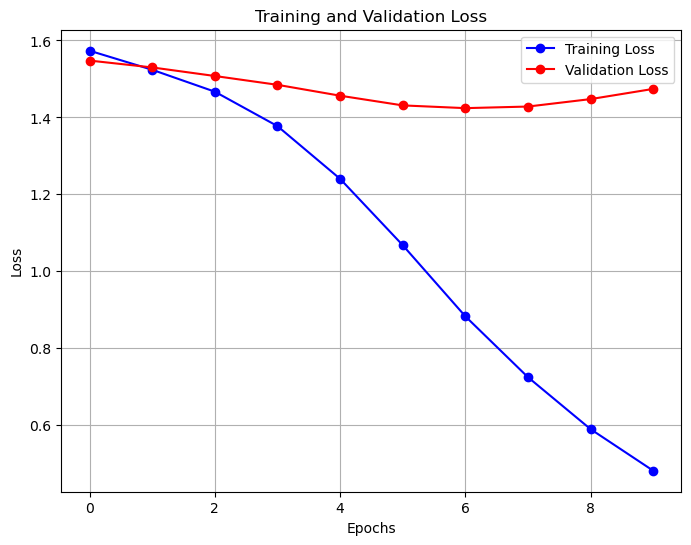

In [220]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
def plot_training_history(history):
    plt.figure(figsize=(8, 6))
    
    # Training loss
    plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
    
    # Validation loss
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red', marker='o')
    
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming history contains the result of model.fit()
plot_training_history(history)


In [164]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


In [174]:
history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test_padded, y_test),
    class_weight=dict(enumerate(class_weights))
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9927 - loss: 0.0389 - val_accuracy: 0.4080 - val_loss: 2.4090
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9958 - loss: 0.0275 - val_accuracy: 0.4200 - val_loss: 2.4377
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9960 - loss: 0.0244 - val_accuracy: 0.4193 - val_loss: 2.4643
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9980 - loss: 0.0190 - val_accuracy: 0.4067 - val_loss: 2.6776
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9990 - loss: 0.0137 - val_accuracy: 0.4133 - val_loss: 2.7329
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9985 - loss: 0.0099 - val_accuracy: 0.4220 - val_loss: 2.7633
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9996 - loss: 0.0115 - val_accuracy: 0.4193 - val_loss: 2.8874
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9994 - loss: 0.0072 - val_accuracy: 0.4147 - v

In [184]:
model = Sequential([
    Input(shape=(max_len,)),  # Assuming max_len=100
    Embedding(input_dim=10000, output_dim=128),  # Embedding layer
    LSTM(128, return_sequences=False),  # LSTM layer
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),  # Dense layer
    Dropout(0.5),  # Dropout for regularization
    Dense(5, activation='softmax')  # Output layer for 5 classes
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot labels
    metrics=['accuracy']
)

history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test_padded, y_test),
    class_weight=dict(enumerate(class_weights))
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 351ms/step - accuracy: 0.1920 - loss: 1.6174 - val_accuracy: 0.1653 - val_loss: 1.6100
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 309ms/step - accuracy: 0.2000 - loss: 1.6125 - val_accuracy: 0.1653 - val_loss: 1.6130
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.1860 - loss: 1.6094 - val_accuracy: 0.1333 - val_loss: 1.6118
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - accuracy: 0.1948 - loss: 1.6066 - val_accuracy: 0.2387 - val_loss: 1.6088
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.1890 - loss: 1.6111 - val_accuracy: 0.1653 - val_loss: 1.6101
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 352ms/step - accuracy: 0.2084 - loss: 1.6017 - val_accuracy: 0.2387 - val_loss: 1.6091
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.1805 - loss: 1.6049 - val_accuracy: 0.1653 - val_loss: 1.6097
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.1831 - loss: 1.6178 - val_accu

In [222]:
y_pred_prob = model.predict(X_test_padded)

# Convert probabilities to class labels
y_pred = y_pred_prob.argmax(axis=1)  # Assumes a softmax output layer


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [224]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.54      0.38      0.44       248
           2       0.28      0.37      0.32       358
           3       0.52      0.41      0.46       278
           4       0.28      0.42      0.34       416

    accuracy                           0.34      1500
   macro avg       0.32      0.32      0.31      1500
weighted avg       0.33      0.34      0.33      1500



C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

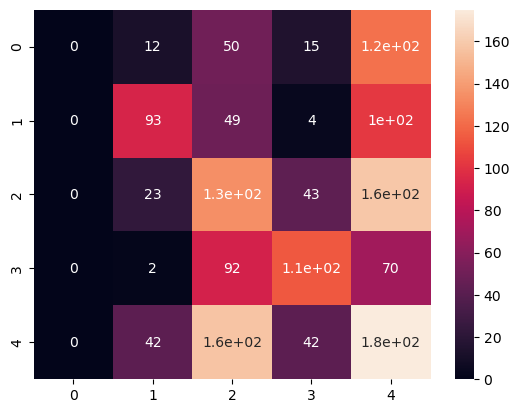

In [260]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(le.inverse_transform(y_test),le.inverse_transform(y_pred)),annot=True)

In [256]:
columns = le.inverse_transform([0,1,2,3,4])

In [252]:
list(le.inverse_transform([1]))

['Extremely Positive']